In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Creación de datos

In [17]:
# Reproducibilidad
np.random.seed(0)

# Parámetros de la función potencial
a = 2
b = 1.5

# Generación valores de x
x = np.linspace(1, 10, 100) 

# Generación de función potencial
y = a * x**b

# Ruido
ruido_intensidad = 20
ruido = np.random.normal(1, ruido_intensidad, y.shape)
y_ruidoso = y + ruido

## Visualización

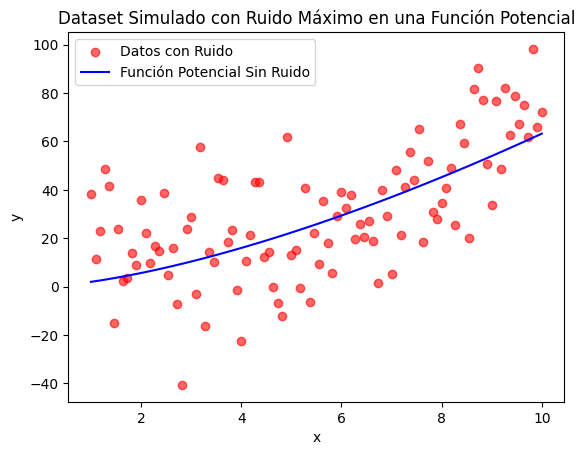

In [18]:
# Visualizar el dataset con ruido
plt.scatter(x, y_ruidoso, label="Datos con Ruido", color="r", alpha=0.6)
plt.plot(x, y, label="Función Potencial Sin Ruido", color="b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Dataset Simulado con Ruido Máximo en una Función Potencial")
plt.show()

## Preprocessing

In [19]:
# Parametros de la linealización
log_x = np.log(x)
log_a = np.log(a)
log_y = np.log(y)

In [20]:
# Función linealizada:
log_y = log_a + b*log_x

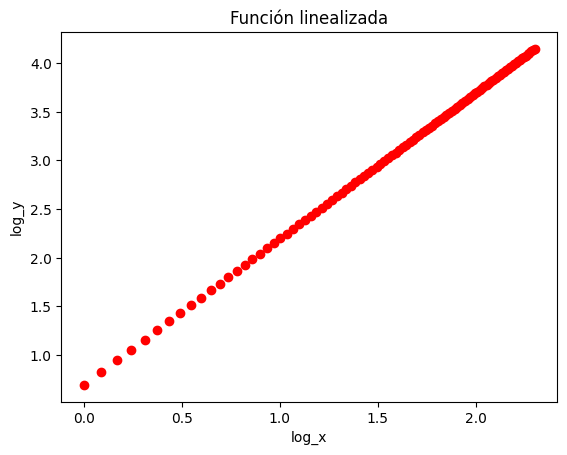

In [21]:
plt.scatter(log_x, log_y, color = 'r')
plt.xlabel('log_x')
plt.ylabel('log_y')
plt.title('Función linealizada')
plt.show()

## Entrenamiento

In [22]:
# Ajuste
log_x = log_x.reshape(-1, 1)
model = linear_model.LinearRegression()
result = model.fit(log_x, log_y.reshape(-1, 1))

In [23]:
# Comparación de parametros
a_result = np.exp(result.intercept_[0])
print(f"""Coef. linealizado : {a_result}
Coef. no linealizado : {a}""")

Coef. linealizado : 1.9999999999999993
Coef. no linealizado : 2


In [27]:
predict = result.predict(log_x)
y_pred = np.exp(predict)

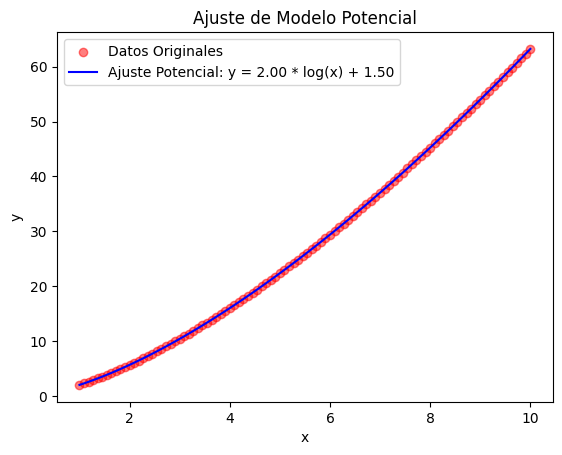

In [33]:
plt.scatter(x, y, label="Datos Originales", color="red", alpha=0.5)
plt.plot(x, y_pred, label=f"Ajuste Potencial: y = {a_result:.2f} * log(x) + {b:.2f}", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Ajuste de Modelo Potencial")
plt.show()